<a href="https://colab.research.google.com/github/olfabre/AMS-Application-BI-V2/blob/main/BI_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analyse exploratoire
## 1.1. Clustering

charge le fichier ks-projects.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ks-projects.csv to ks-projects.csv


Aperçu du dataset :


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed



Types des colonnes :
id               int64
name            object
category        object
subcategory     object
country         object
sex             object
age              int64
start_date      object
end_date        object
currency        object
goal           float64
pledged        float64
backers          int64
state           object
dtype: object

Statistiques descriptives :


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
count,3.006270e+05,300623,300627,300627,296830,291719,300627.000000,300627,300627,300627,3.006270e+05,3.006270e+05,300627.000000,300627
unique,NaN,298680,15,158,18,2,NaN,300179,274233,10,NaN,NaN,NaN,6
top,NaN,New EP/Music Development,Film & Video,Product Design,US,female,NaN,1970-01-01 01:00:00,2012-01-01 05:59:00,USD,NaN,NaN,NaN,failed
freq,NaN,41,55032,15443,242613,147517,NaN,7,47,245351,NaN,NaN,NaN,156301
mean,4.992343e+08,NaN,NaN,NaN,NaN,NaN,27.620044,NaN,NaN,NaN,4.637402e+04,8.239740e+03,98.235581,NaN
std,2.888665e+08,NaN,NaN,NaN,NaN,NaN,7.206378,NaN,NaN,NaN,1.137581e+06,8.688740e+04,890.415481,NaN
min,4.701000e+03,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000e-02,0.000000e+00,0.000000,NaN
25%,2.493480e+08,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,2.000000e+03,3.000000e+01,2.000000,NaN
50%,4.987463e+08,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,5.000000e+03,6.010000e+02,12.000000,NaN
75%,7.497511e+08,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,1.500000e+04,3.825000e+03,54.000000,NaN



Nombre de colonnes : 14
Nombre de lignes : 300627


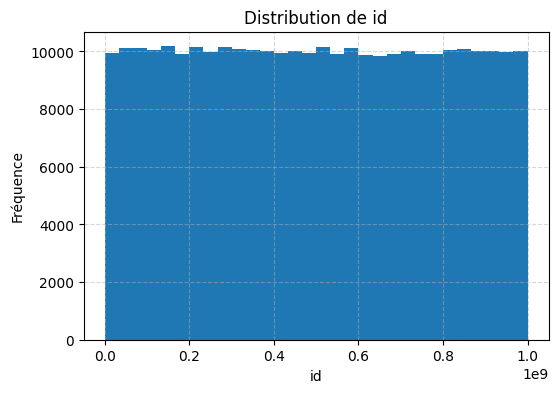

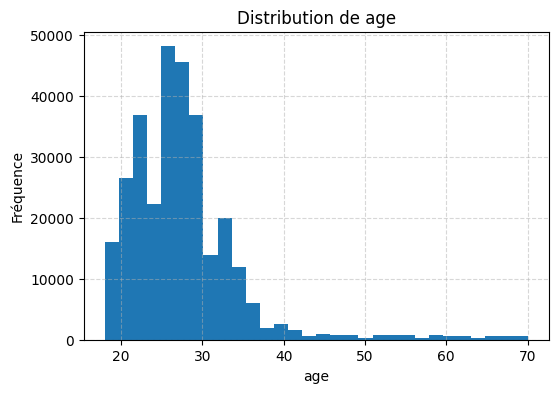

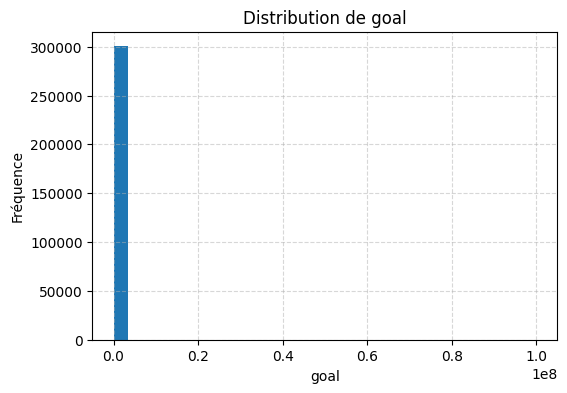

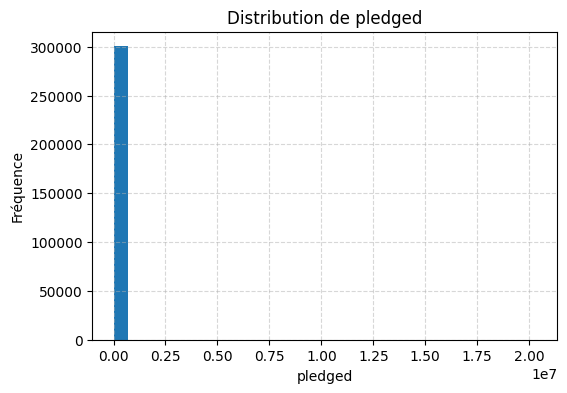

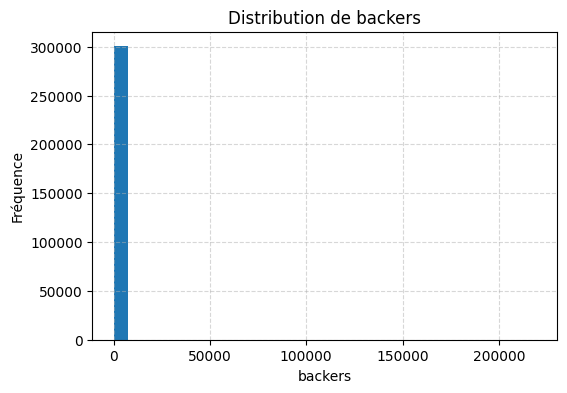

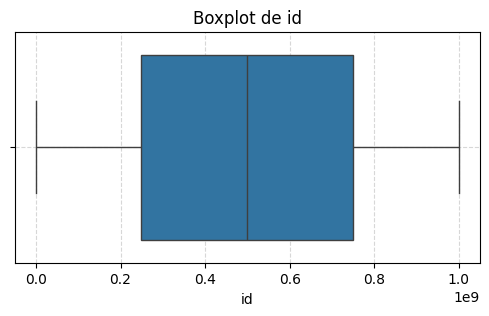

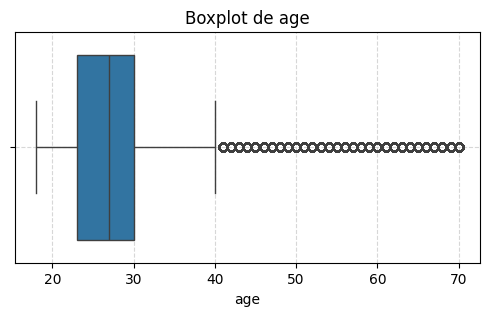

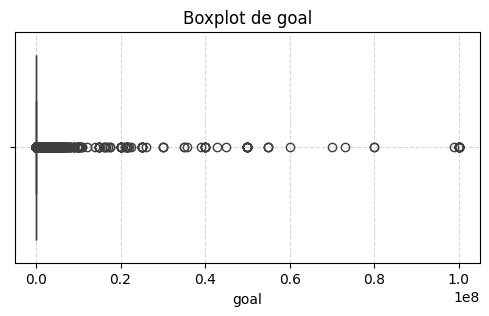

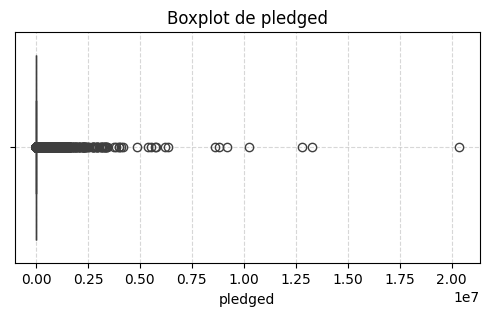

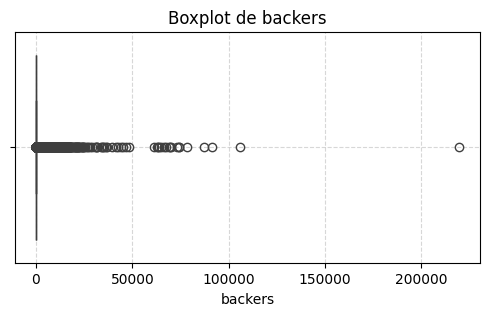

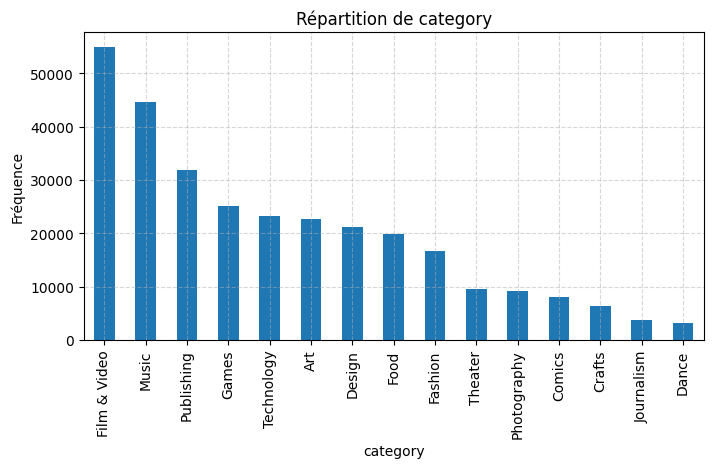

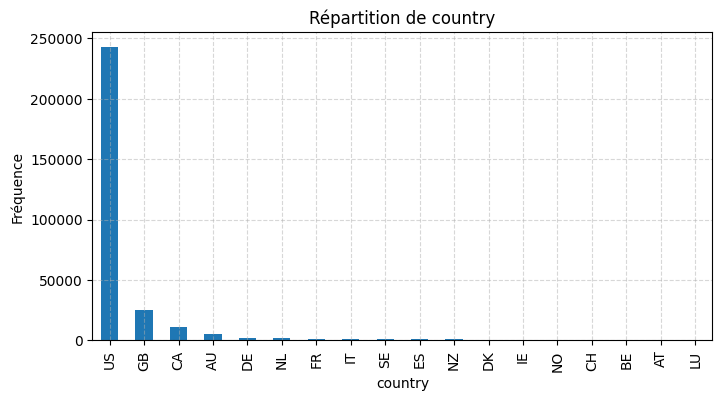

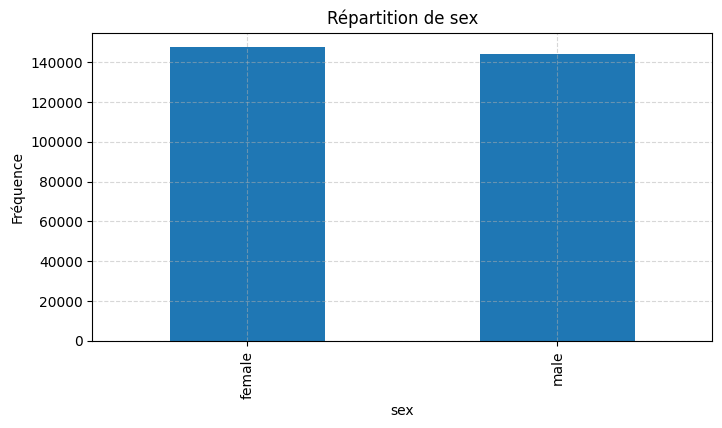

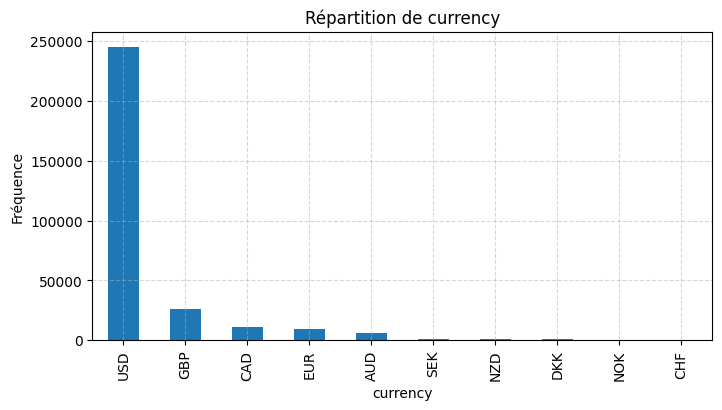

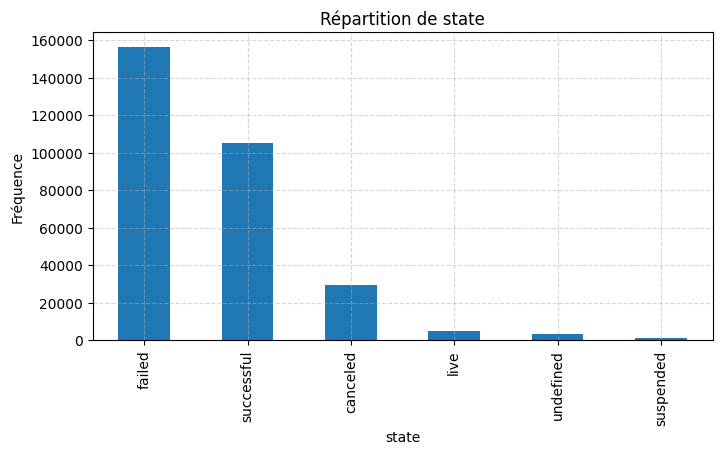

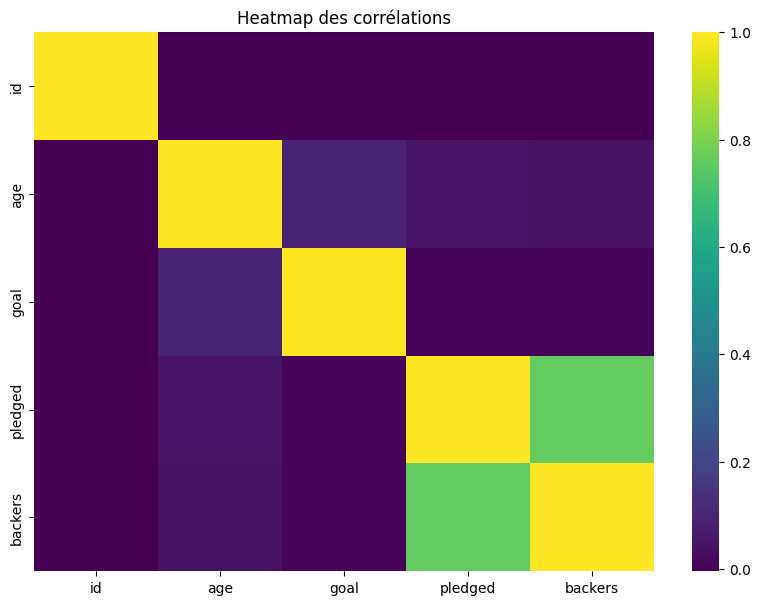

In [2]:
# ================================
#        IMPORTS
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_object_dtype

# ================================
#        CHARGEMENT CSV
# ================================
df = pd.read_csv('ks-projects.csv', encoding='latin1')

# ================================
#        APERÇU & INFO
# ================================
print("Aperçu du dataset :")
display(df.head())

print("\nTypes des colonnes :")
print(df.dtypes)

print("\nStatistiques descriptives :")
display(df.describe(include='all'))

# ================================
#      NOMBRE D'ATTRIBUTS
# ================================
print("\nNombre de colonnes :", df.shape[1])
print("Nombre de lignes :", df.shape[0])

# ================================
#   HISTOGRAMMES (colonnes numériques)
# ================================
numeric_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# ================================
#   BOXPLOTS (détection outliers)
# ================================
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# ================================
# BARPLOTS (colonnes catégorielles)
# ================================
categorical_cols = [col for col in df.columns if is_object_dtype(df[col])]
categorical_cols

for col in categorical_cols:
    if df[col].nunique() <= 30:  # évite les colonnes avec trop de valeurs uniques
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Répartition de {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

# ================================
#      HEATMAP CORRÉLATION
# ================================
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="viridis")
plt.title("Heatmap des corrélations")
plt.show()
